# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Elena Andreeva*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline
import random

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [2]:
def get_pdf_cdf(G):
    # Calculate PDF
    degrees = np.array(G.degree().values(), dtype = np.int)
    degrees_bins = np.bincount(degrees)
    pdf = degrees_bins * 1.0 / G.number_of_nodes()
    # Calculate CDF
    cdf = np.cumsum(pdf)
    return (pdf, cdf)


def do_task1(n0, m0, m, T, step, model):
    
    avg_path_lens = []
    avg_cl_coefs = []
    x = []
    age_to_degrees = dict()
    
    G = nx.Graph()
    G.add_nodes_from(range(0, n0))
    # Initialize connections,
    # as we need the graph to be connected
    G.add_cycle(range(0, n0))
    rich_nodes = set()
    t = 0
    repeated_nodes = list(G.nodes())
    while t <= T:
    
        if model == "A":
            # no pref attachment
            neighbourghs = nx.random_graphs._random_subset(G.nodes(),m)
            i = len(G.nodes())
            G.add_node(i)
            for neighbour in neighbourghs:
                G.add_edge(i, neighbour)
        
        if model == "B":
            # no growth
            # randomly choose one of the nodes
            while True:
                node = random.choice(G.nodes())
                if node not in rich_nodes:
                    break
            # and add edges
            nei = set(G.neighbors(node))
            neighbors = nx.random_graphs._random_subset(
                filter(lambda x: x != node, repeated_nodes), m)
            for nei in neighbors:
                repeated_nodes.append(nei)
                repeated_nodes.append(node)
                G.add_edge(nei, node)
            if G.degree(node) + m > len(G.nodes()):
                rich_nodes.append(node)
                repeated_nodes = filter(lambda x: x not in rich_nodes, repeated_nodes)
                       
        if t % step == 0:
            avg_path_lens.append(nx.average_shortest_path_length(G))
            avg_cl_coefs.append(nx.average_clustering(G))
            x.append(len(G.nodes()))
            
        if model == "A":
            for node in G.nodes():
                age_to_degrees[t + 1] = []
                age = t + n0 -node
                if node < n0:
                    age = t + 1
                #print("Node {}, t {}, age {}, degree {}".format(node, t, age, G.degree(node)))
                if age not in age_to_degrees:
                    age_to_degrees[age] = []
                age_to_degrees[age].append(G.degree(node) * 1.0)
        if model == "B":
            age = t
            age_to_degrees[age] = len(G.edges())*2.0/len(G.nodes())
            
        t+= 1
#        if t % 10 == 0:
#            print t
  
    
    pdf, cdf = get_pdf_cdf(G)

    avg_degrees_y = []
    avg_degrees_x = []
    for key in sorted(age_to_degrees.keys()):
        avg_degrees_x.append(key)
        avg_degrees_y.append(np.mean(age_to_degrees[key]))
    
    plt.figure(figsize=(20,5))
        
    plt.subplot(1,2,1)
    plt.loglog(np.arange(0, len(pdf)), pdf, 'r')
    plt.title("PDF, n0={}, m0={}, m={}".format(n0, m0 ,m))
    plt.xlabel("node degrees")
    plt.ylabel("PDF")
    plt.subplot(1,2,2)
    plt.loglog(np.arange(0, len(cdf)), cdf, 'r')
    plt.title("CDF, n0={}, m0={}, m={}".format(n0, m0 ,m))
    plt.xlabel("node degrees")
    plt.ylabel("CDF")
    
    plt.figure(figsize=(20,5))
        
    plt.subplot(1,3,1)
    plt.plot(x, avg_path_lens, 'b')
    plt.title("Avg path length to # of nodes, n0={}, m0={}, m={}".format(n0, m0 ,m))
    plt.xlabel("Num of nodes")
    plt.ylabel("Avg path len")
    plt.subplot(1,3,2)
    plt.plot(x, avg_cl_coefs, 'b')
    plt.title("Avg clustering coef. to # of nodes, n0={}, m0={}, m={}".format(n0, m0 ,m))
    plt.xlabel("Num of nodes")
    plt.ylabel("Avg clustering coef")
    plt.subplot(1,3,3)
    plt.plot(avg_degrees_x, avg_degrees_y, 'b')
    plt.title("Node degree to node age, n0={}, m0={}, m={}".format(n0, m0 ,m))
    plt.xlabel("Node age")
    plt.ylabel("Node degree")
    print("Average path len = {}, N = {}".format(avg_path_lens[-1], len(G.nodes())))
    print("Average clustering coefficient = {}, N = {}".format(avg_cl_coefs[-1], len(G.nodes())))
    

Average path len = 4.92980421286, N = 1004
Average clustering coefficient = 0.00334585879319, N = 1004
Average path len = 3.53162930536, N = 1011
Average clustering coefficient = 0.00988436033892, N = 1011
Average path len = 2.72052570242, N = 1011
Average clustering coefficient = 0.0243082353339, N = 1011


C:\Users\Lena\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Lena\Anaconda2\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


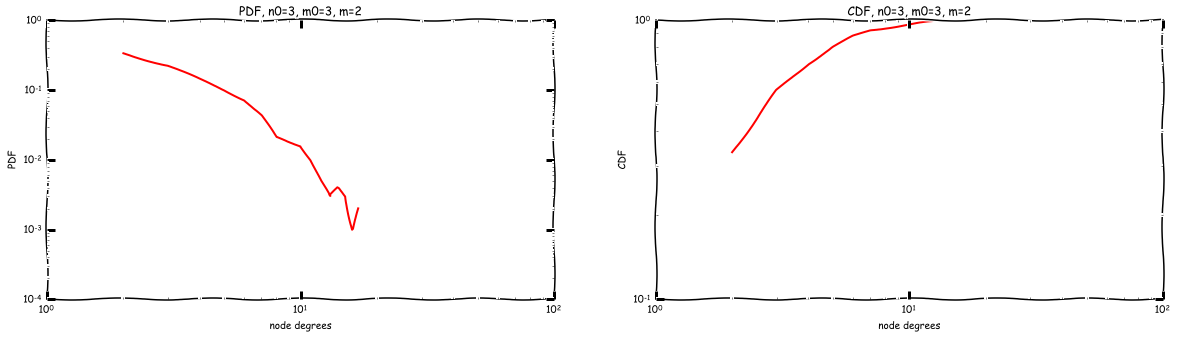

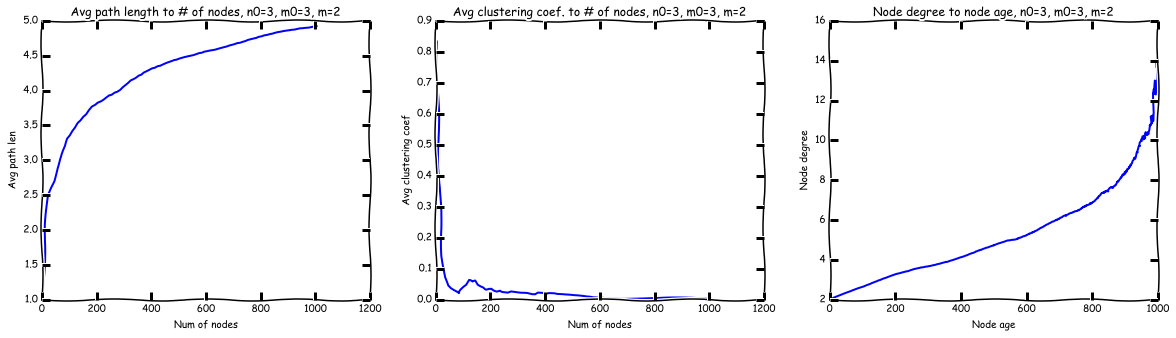

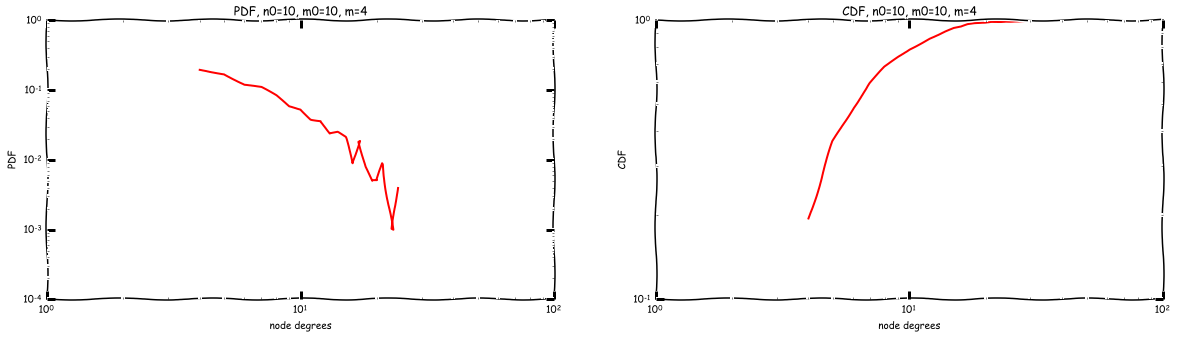

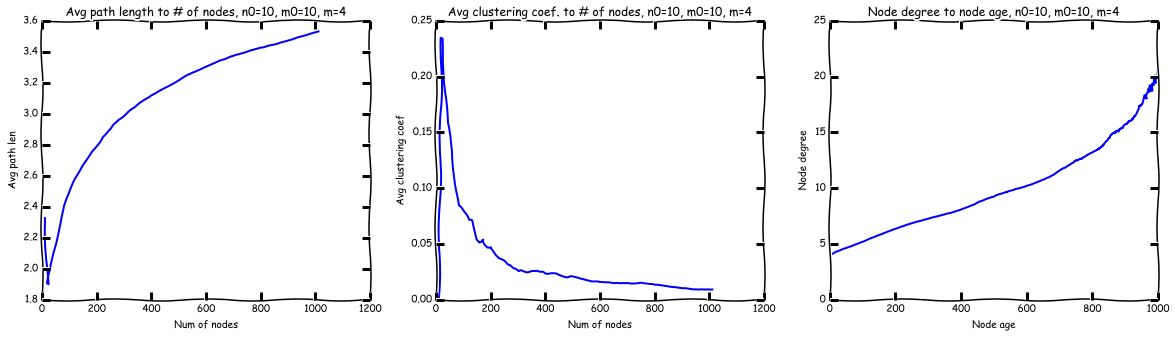

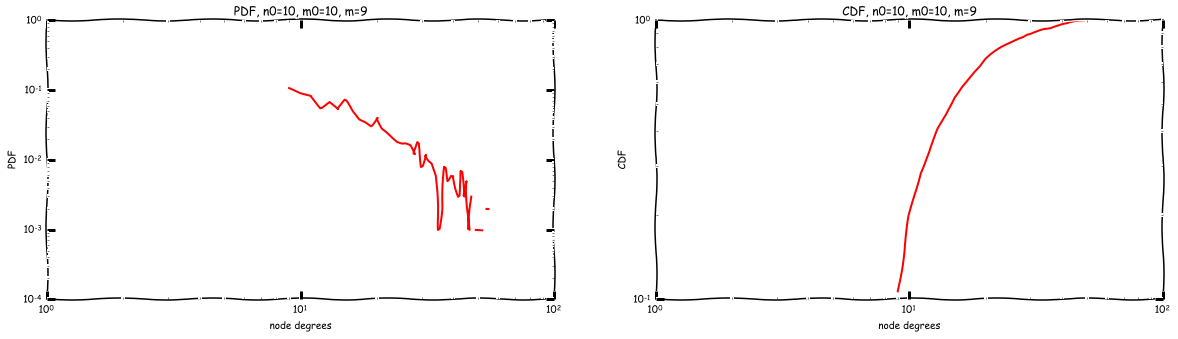

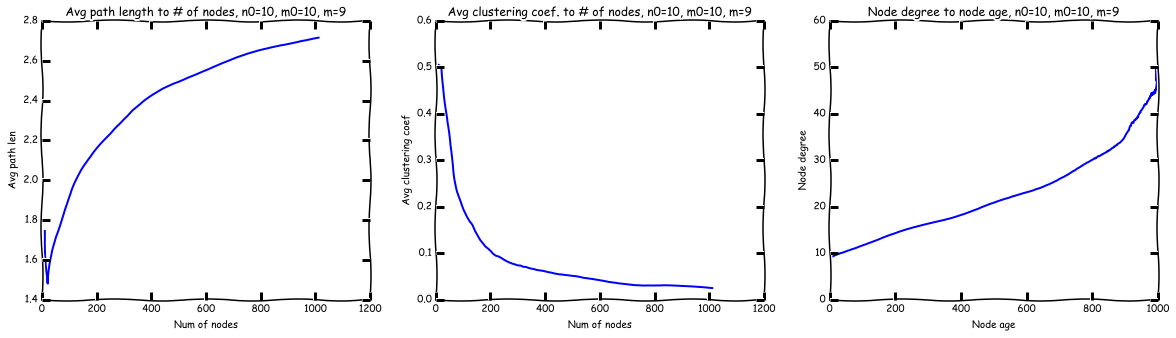

In [3]:
# Model A
n0 = 3 # nodes at the beggining
m0 = 3 # edges at the beginning
m = 2 # edges added at each step
T = 1000
step = 10 # for graphics
do_task1(n0, m0, m, T, step, "A")
n0 = 10 # nodes at the beggining
m0 = 10 # edges at the beginning
m = 4 # edges added at each step
do_task1(n0, m0, m, T, step, "A")
n0 = 10 # nodes at the beggining
m0 = 10 # edges at the beginning
m = 9 # edges added at each step
do_task1(n0, m0, m, T, step, "A")

Average path len = 2.69394994995, N = 1000
Average clustering coefficient = 0.0530248866448, N = 1000
Average path len = 2.96875987994, N = 2000
Average clustering coefficient = 0.0436429063476, N = 2000
Average path len = 2.79880190095, N = 2000
Average clustering coefficient = 0.0811239166098, N = 2000


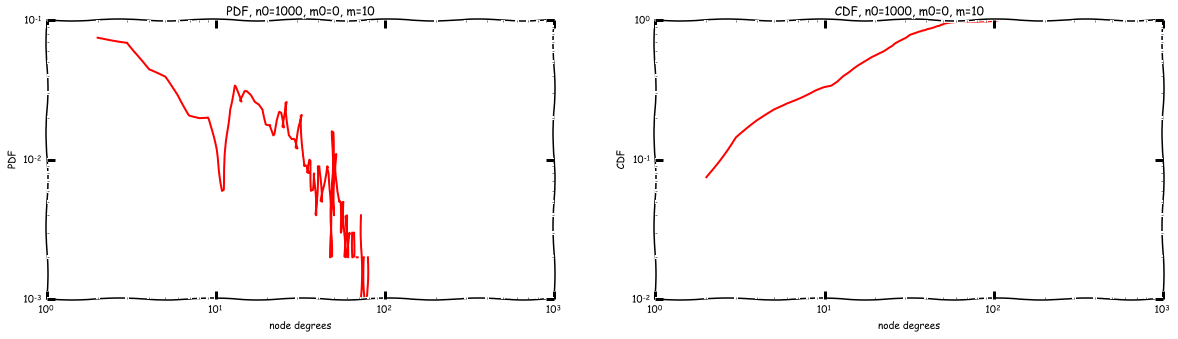

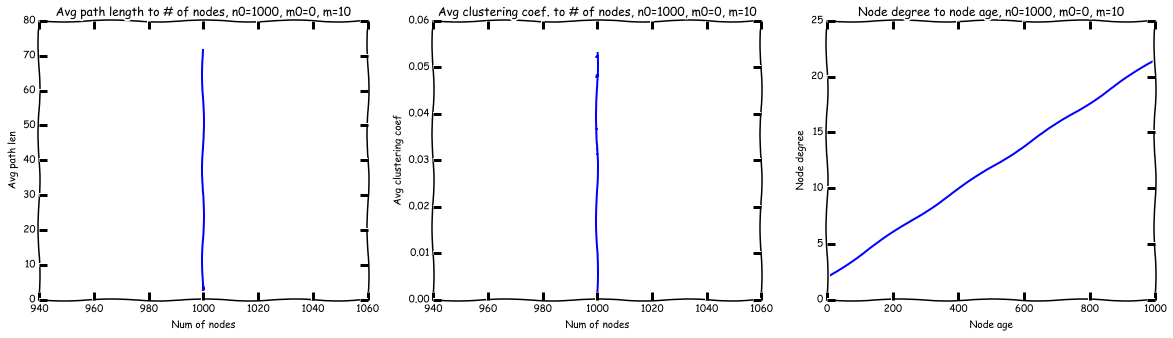

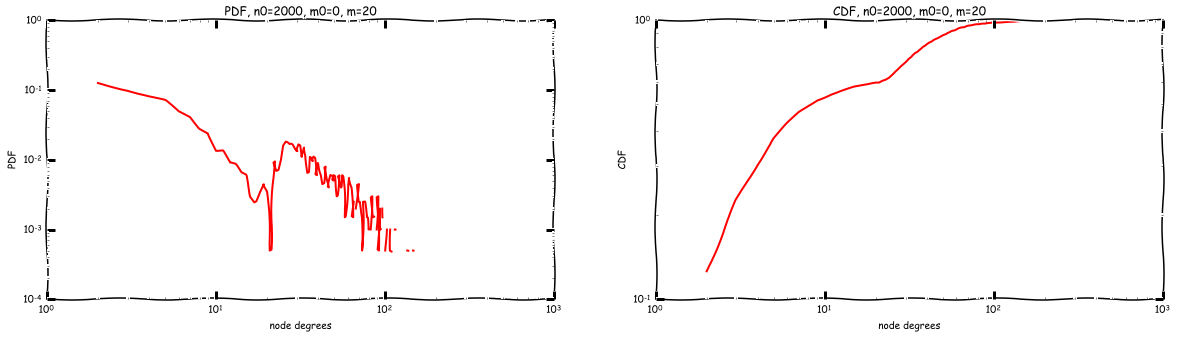

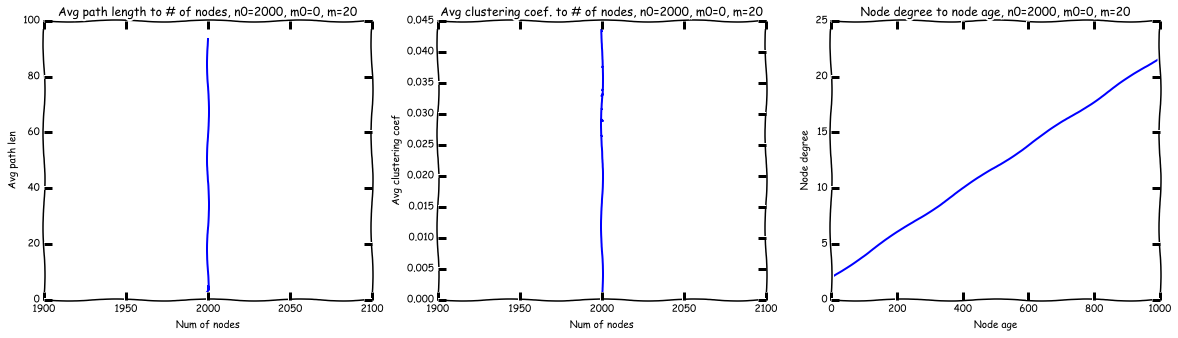

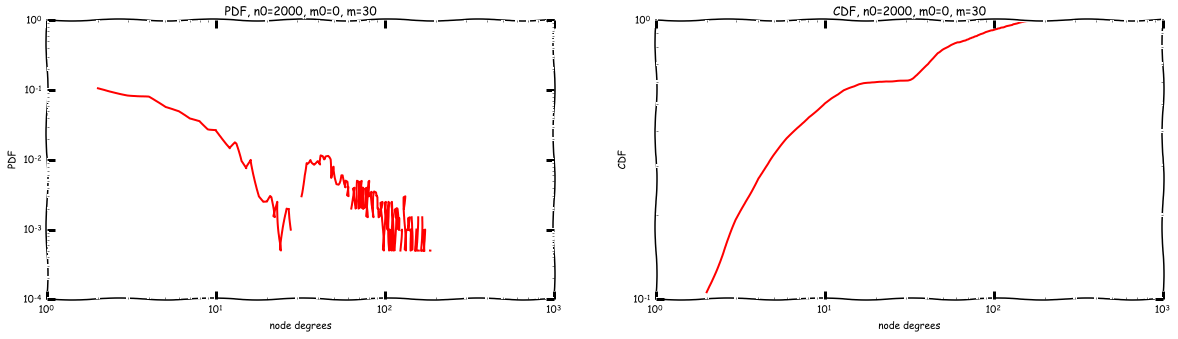

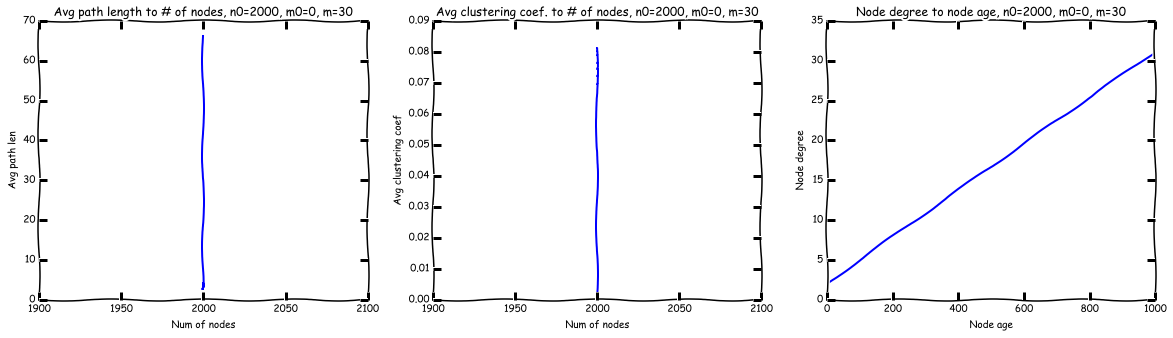

In [4]:
n0 = 1000 # nodes at the beggining
m0 = 0 # edges at the beginning
m = 10 # edges added at each step
T = 1000
step = 15 # for graphics
do_task1(n0, m0, m, T, step, "B")
n0 = 2000 # nodes at the beggining
m0 = 0 # edges at the beginning
m = 20 # edges added at each step
do_task1(n0, m0, m, T, step, "B")
n0 = 2000 # nodes at the beggining
m0 = 0 # edges at the beginning
m = 30 # edges added at each step
do_task1(n0, m0, m, T, step, "B")

As we see, the PDFs and CDFs doesn't look like Power Law at all, so one can draw only one conclusion: the model has to have both properties to have scale-free property conserved. In the other case, the property will not be conserved.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

In [13]:
def do_task2(q, n0, N, step):
    
    avg_path_lens = []
    avg_cl_coefs = []
    x = []
    age_to_degrees = dict()
    
    G = nx.erdos_renyi_graph(n0, 0.35)

    t = 0
    while len(G.nodes()) <= N:
        
        # pick a node to copy
        node = random.choice(G.nodes())
        
        i = len(G.nodes())
        G.add_node(i)
        
        # get neighbors
        neighbors = G.neighbors(node)
        
        # copy edges
        for nei in neighbors:
            rand = random.random()
            if rand < q:
                # copy edge
                G.add_edge(i, nei)
            else:
                # randomly choose new node
                while True:
                    node = random.choice(G.nodes())
                    if node != i:
                        break
                G.add_edge(i, node)
        
                       
        if t % step == 0:
            avg_path_lens.append(nx.average_shortest_path_length(G))
            avg_cl_coefs.append(nx.average_clustering(G))
            x.append(len(G.nodes()))
            

            for node in G.nodes():
                age_to_degrees[t + 1] = []
                age = t + n0 -node
                if node < n0:
                    age = t + 1
                #print("Node {}, t {}, age {}, degree {}".format(node, t, age, G.degree(node)))
                if age not in age_to_degrees:
                    age_to_degrees[age] = []
                age_to_degrees[age].append(G.degree(node) * 1.0)
        t+= 1

  
    
    pdf, cdf = get_pdf_cdf(G)

    avg_degrees_y = []
    avg_degrees_x = []
    for key in sorted(age_to_degrees.keys()):
        avg_degrees_x.append(key)
        avg_degrees_y.append(np.mean(age_to_degrees[key]))
    
    plt.figure(figsize=(20,5))
        
    plt.subplot(1,2,1)
    plt.loglog(np.arange(0, len(pdf)), pdf, 'r')
    plt.title("PDF, n0={}, m0={}, m={}".format(n0, m0 ,m))
    plt.xlabel("node degrees")
    plt.ylabel("PDF")
    plt.subplot(1,2,2)
    plt.loglog(np.arange(0, len(cdf)), cdf, 'r')
    plt.title("CDF, n0={}, m0={}, m={}".format(n0, m0 ,m))
    plt.xlabel("node degrees")
    plt.ylabel("CDF")
    
    plt.figure(figsize=(20,5))
        
    plt.subplot(1,3,1)
    plt.plot(x, avg_path_lens, 'b')
    plt.title("Avg path length to # of nodes, n0={}, q={}".format(n0, q))
    plt.xlabel("Num of nodes")
    plt.ylabel("Avg path len")
    plt.subplot(1,3,2)
    plt.plot(x, avg_cl_coefs, 'b')
    plt.title("Avg clustering coef. to # of nodes, n0={}, q={}".format(n0, q))
    plt.xlabel("Num of nodes")
    plt.ylabel("Avg clustering coef")
    plt.subplot(1,3,3)
    plt.plot(avg_degrees_x, avg_degrees_y, 'b')
    plt.title("Node degree to node age, n0={}, q={}".format(n0, q))
    plt.xlabel("Node age")
    plt.ylabel("Node degree")
    print("Average path len = {}, N = {}".format(avg_path_lens[-1], len(G.nodes())))
    print("Average clustering coefficient = {}, N = {}".format(avg_cl_coefs[-1], len(G.nodes())))
    

Average path len = 1.79991008991, N = 1001
Average clustering coefficient = 0.202743524155, N = 1001
Average path len = 1.78046753247, N = 1001
Average clustering coefficient = 0.223542642658, N = 1001
Average path len = 1.75013386613, N = 1001
Average clustering coefficient = 0.25629391415, N = 1001


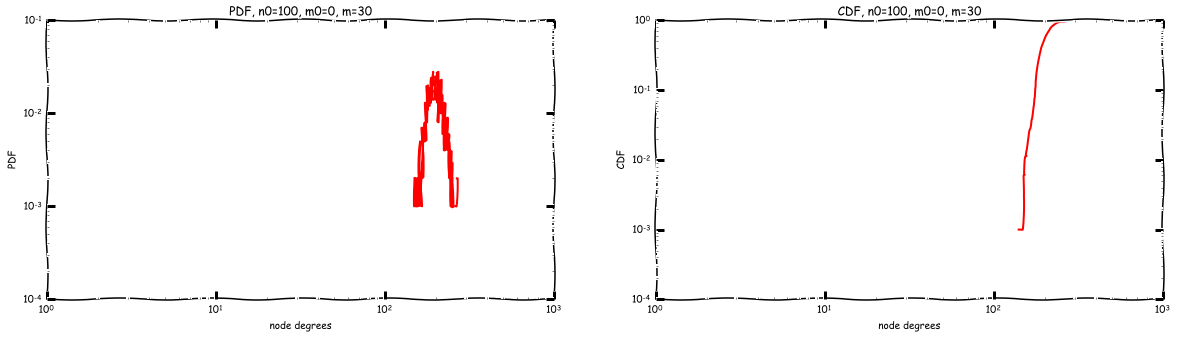

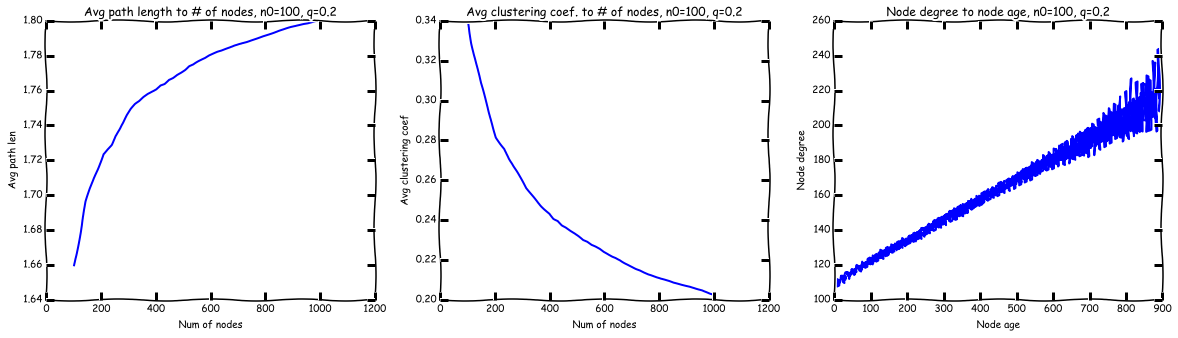

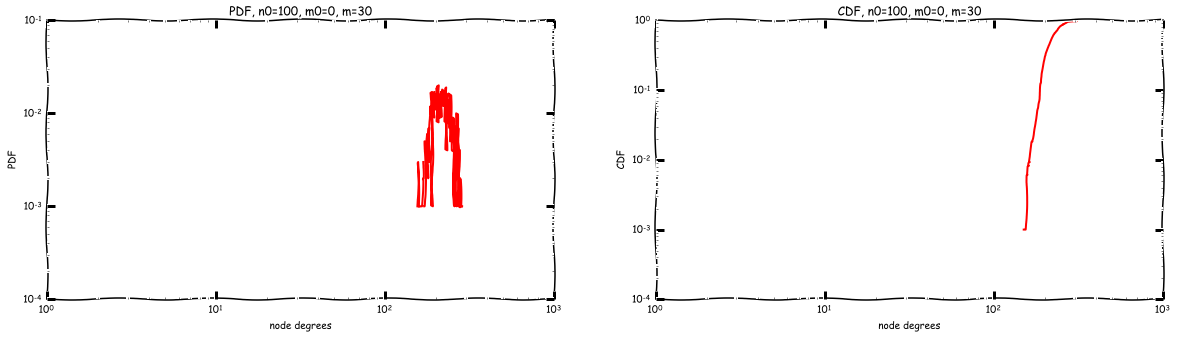

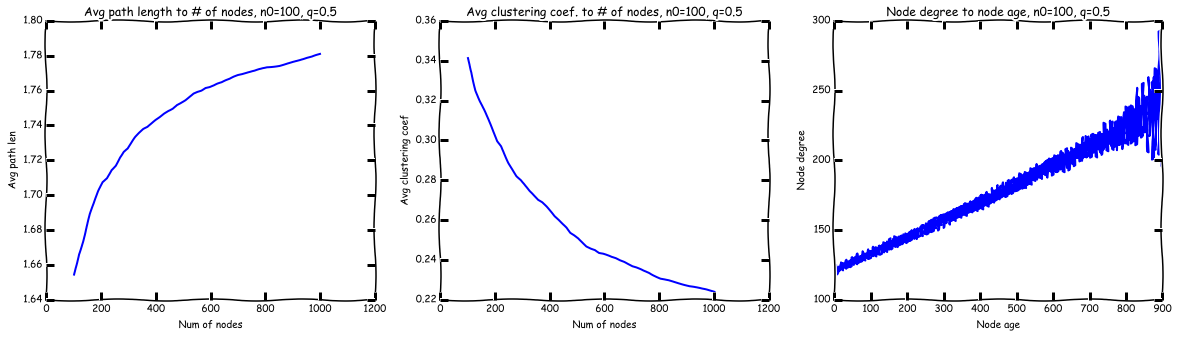

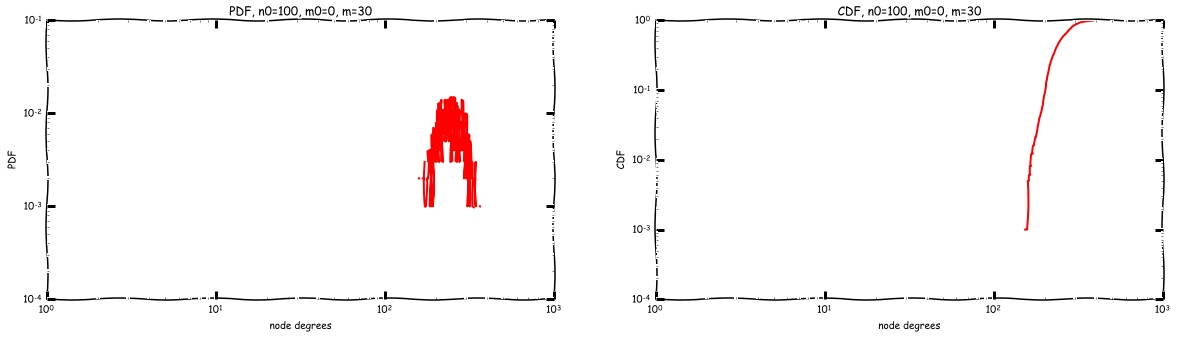

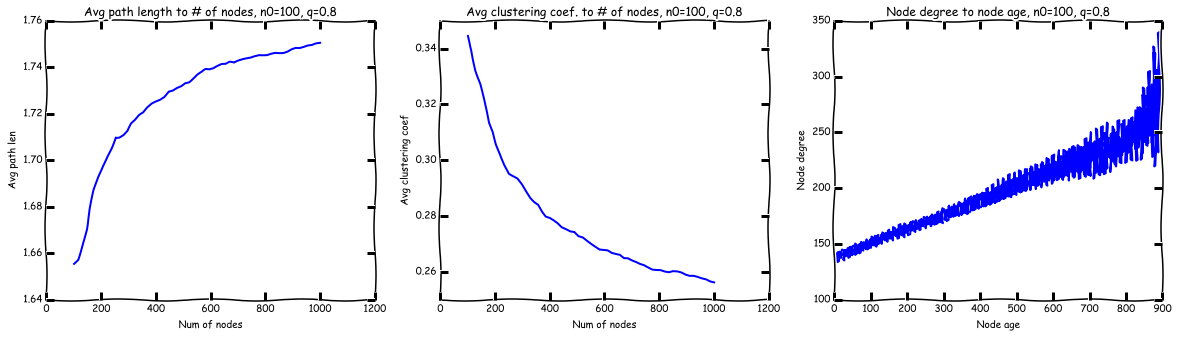

In [14]:
n0 = 100
N = 1000
q = 0.2
step = 15

do_task2(q, n0, N, step)
q = 0.5
do_task2(q, n0, N, step)
q = 0.8
do_task2(q, n0, N, step)